# 🏥 Ejercicios Prácticos: Limpieza de Registros Médicos

**Curso:** Extracción de Conocimiento en Bases de Datos  
**Ejercicio:** Limpieza y Transformación de Datos Médicos  
**Dataset:** `registros_medicos_sucios_15k.csv`

---

## 🎯 Objetivos del Ejercicio

Al completar este ejercicio, serás capaz de:

1. **🔍 Identificar** diferentes tipos de problemas en datos médicos reales
2. **🛠️ Aplicar** técnicas específicas de limpieza para cada problema
3. **📊 Validar** la calidad de los datos después de la limpieza
4. **📝 Documentar** el proceso de limpieza realizado
5. **⚡ Automatizar** procesos de limpieza para datos similares

---

## 📋 Problemas a Resolver

El dataset contiene **15,000+ registros médicos** con los siguientes problemas:

| 🚨 **Problema** | 📊 **Cantidad Estimada** | 🎯 **Técnica Requerida** |
|-----------------|---------------------------|---------------------------|
| Valores Faltantes | 5-25% por columna | Imputación/Eliminación |
| Duplicados | ~800 registros | Detección y eliminación |
| Formatos Inconsistentes | ~1,500 registros | Estandarización |
| Valores Atípicos | ~300 registros | Detección y tratamiento |
| Errores de Tipo | ~150 registros | Conversión de tipos |

---

## ⚠️ Instrucciones Importantes

1. **📖 Lee cada sección completamente** antes de escribir código
2. **💾 Siempre trabaja en una copia** del dataset original
3. **📊 Documenta cada decisión** de limpieza que tomes
4. **✅ Valida los resultados** después de cada transformación
5. **🔄 Mantén un registro** de todas las transformaciones aplicadas

---

> 💡 **Tip:** En el mundo real, la limpieza de datos médicos requiere conocimiento del dominio. ¡Piensa como un profesional de la salud!

## 📦 Paso 1: Configuración Inicial

Antes de comenzar, necesitas cargar las librerías necesarias y el dataset.

### 🎯 Tareas:
1. Importa pandas, numpy, matplotlib, seaborn
2. Configura las opciones de visualización
3. Carga el dataset `registros_medicos_sucios_15k.csv`
4. Realiza una exploración inicial básica

In [2]:
# 📦 EJERCICIO 1.1: Importar librerías necesarias
# TODO: Importa las siguientes librerías:
# - pandas (como pd)
# - numpy (como np) 
# - matplotlib.pyplot (como plt)
# - seaborn (como sns)
# - datetime (para manejo de fechas)
# - warnings (para suprimir advertencias)

# Tu código aquí:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings

# Configuraciones recomendadas (descomenta y ajusta):
plt.style.use('default')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

print("✅ Librerías importadas exitosamente!")

✅ Librerías importadas exitosamente!


In [3]:
# 📂 EJERCICIO 1.2: Cargar el dataset
# TODO: Carga el archivo 'registros_medicos_sucios_15k.csv'
# Guárdalo en una variable llamada 'df_original'

# Tu código aquí:
df_original=pd.read_csv('registros_medicos_sucios_15k.csv') 

# TODO: Muestra información básica del dataset:
# - Dimensiones (shape)
# - Primeras 5 filas
# - Tipos de datos básicos


print("📊 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 40)

# Tu código aquí para mostrar:
# 1. Dimensiones
# 2. Primeras filas
# 3. Información general
print(f'Dimensiones del csv: {df_original.shape[0]}')

print("=" * 40)
print(f'Descripcion del csv \n{df_original.describe()}')
df_original.head()

📊 INFORMACIÓN BÁSICA DEL DATASET
Dimensiones del csv: 15600
Descripcion del csv 
                BMI  BloodPressureDiastolic   Temperature           Age
count  15600.000000            15600.000000  14342.000000  15600.000000
mean      24.793654               79.837903     36.420959     44.752949
std        7.132201               16.532477      1.927016     35.064987
min        3.700000              -20.000000     -5.000000     -5.000000
25%       19.800000               69.736150     35.962624     24.000000
50%       24.000000               80.020461     36.491932     44.000000
75%       28.900000               90.237388     37.036367     64.000000
max       71.000000              200.000000     50.000000    999.000000


,PatientID,FirstName,LastName,DateOfBirth,Gender,Phone,Email,Address,BloodType,Height,Weight,BMI,BloodPressureSystolic,BloodPressureDiastolic,HeartRate,Temperature,AdmissionDate,Specialty,DiagnosisCode,DiagnosisDescription,Medication,Dosage,MaritalStatus,InsuranceType,InsuranceNumber,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions,LastVisitDate,Age
0,PAT000001,Isabel,Ramos,2009-12-04 00:00:00,Femenino,648797143,isabel.ramos@gmail.com,Avenida Pérez 125,B+,177.4507122951685,67.84865175311606,21.5,80.38856064879187,95.746737,76.18256639502204,35.797246,2025-01-06 15:57:16.828281,Psiquiatría,I10,Hipertensión Esencial,Enalapril,278mg,Divorciado,Privado,INS774142,NaN,681325286,Ninguna,Asma,2025-05-24 15:57:16.877774,16
1,PAT000002,Juan,Rodríguez,1966-06-04 00:00:00,Masculino,NaN,juan.rodríguez@telefonica.net,Avenida López 69,NaN,167.92603548243224,69.51016144389536,24.6,98.90028706126256,68.292009,83.44346224777587,36.995105,2024-05-30 15:57:16.828290,Oncología,M79.1,Mialgia,Prednisona,438mg,Divorciado,Privado,NaN,Roberto González,688137819,Penicilina,Artritis,2025-04-23 15:57:16.877785,58
2,PAT000003,Elena,Jiménez,1954-02-20 00:00:00,Masculino,636656301,elena.jiménez@gmail.com,Plaza Serrano 77,AB+,179.71532807151038,70.96442317881373,22.0,108.25943187414828,97.991055,80.11652929925059,35.596912,2024-09-02 15:57:16.828292,Radiología,K21.9,Reflujo Gastroesofágico,Clonazepam,263mg,Soltero,Mixto,INS885470,Silvia Ruiz,612275648,Ninguna,Diabetes,2024-12-26 15:57:16.877787,70
3,PAT000004,Rosa,Moreno,1995-05-02 00:00:00,Masculino,630 922 226,rosa.moreno@yahoo.es,Calle Ramos 127,NaN,192.84544784612038,84.2029219246927,22.6,122.99337821849383,79.083114,55.83128702710624,37.425960,2025-02-08 15:57:16.828294,Radiología,J06.9,Infección Respiratoria Aguda,Ácido Acetilsalicílico,469mg,Divorciado,Público,NaN,Alberto Rodríguez,34684819978,Ninguna,Diabetes,2024-12-03 15:57:16.877788,30
4,PAT000005,David,Gil,2019-03-22 00:00:00,Femenino,613149034,NaN,NaN,A-,166.48769937914997,58.79174037269885,21.2,140.48324653213757,92.842298,72.20669546958109,35.901749,2025-05-29 15:57:16.828294,Pediatría,K59.0,Estreñimiento,Ácido Acetilsalicílico,30mg,Casado,Sin Seguro,INS508521,David García,688071916,Lactosa,NaN,2025-05-14 15:57:16.877789,6


## 🔍 Paso 2: Análisis Exploratorio de Problemas

Antes de limpiar, necesitas entender exactamente qué problemas tiene el dataset.

### 🎯 Tareas:
1. Identifica valores faltantes por columna
2. Detecta duplicados exactos y potenciales
3. Analiza inconsistencias en formatos
4. Identifica valores atípicos en variables numéricas
5. Detecta errores de tipos de datos

🕳️ ANÁLISIS DE VALORES FALTANTES
Valores nulos en la columna PatientID 0 
Valores nulos en la columna FirstName 0 
Valores nulos en la columna LastName 0 
Valores nulos en la columna DateOfBirth 0 
Valores nulos en la columna Gender 0 
Valores nulos en la columna Phone 1572 
Valores nulos en la columna Email 1313 
Valores nulos en la columna Address 1830 
Valores nulos en la columna BloodType 2386 
Valores nulos en la columna Height 841 
Valores nulos en la columna Weight 808 
Valores nulos en la columna BMI 0 
Valores nulos en la columna BloodPressureSystolic 9 
Valores nulos en la columna HeartRate 10 
Valores nulos en la columna Temperature 1258 
Valores nulos en la columna AdmissionDate 0 
Valores nulos en la columna Specialty 0 
Valores nulos en la columna DiagnosisCode 0 
Valores nulos en la columna DiagnosisDescription 0 
Valores nulos en la columna Medication 948 
Valores nulos en la columna Dosage 929 
Valores nulos en la columna MaritalStatus 0 
Valores nulos en la columna In

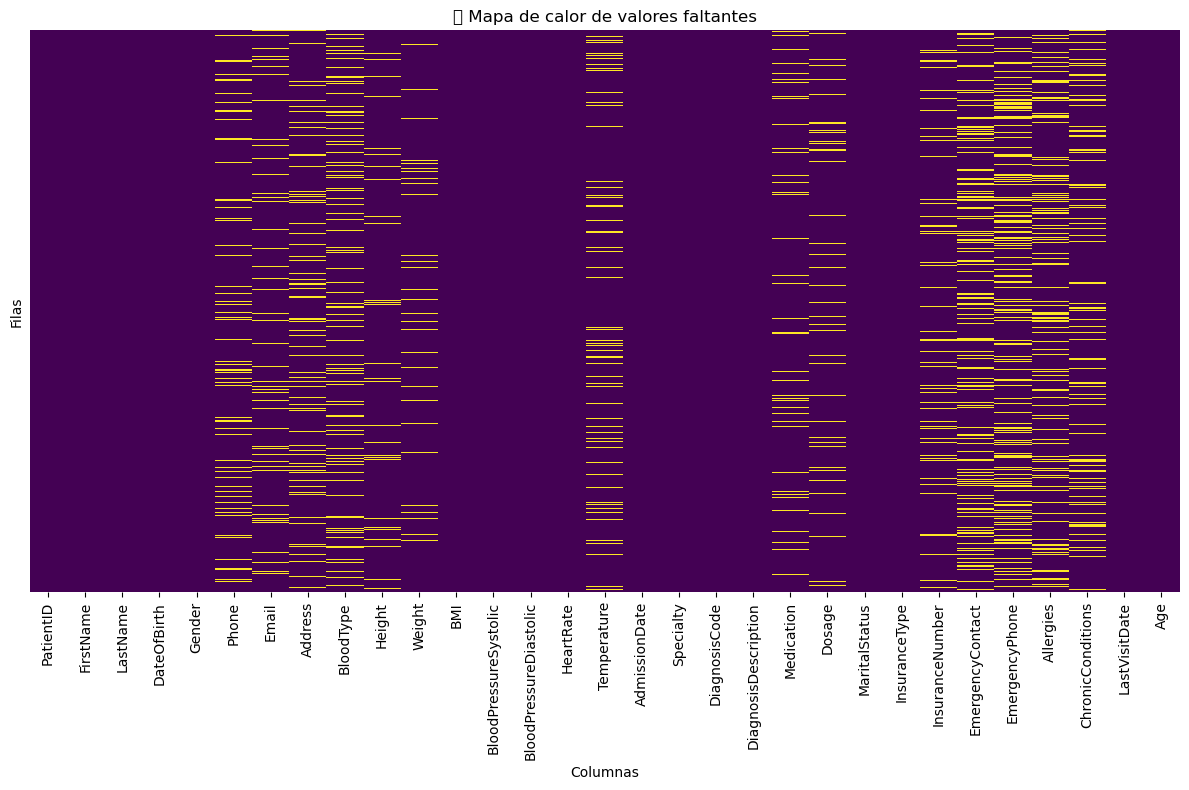


💭 REFLEXIÓN:
Columnas con más faltantes: Address, BloodType, Phone, Temperature,Email,Medication,Dosage,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions     
Posible razón médica: _______________


In [4]:
# 🕳️ EJERCICIO 2.1: Análisis de Valores Faltantes
print("🕳️ ANÁLISIS DE VALORES FALTANTES")
print("=" * 40)
pd.set_option('display.max_rows', None)
# TODO: Analiza los valores faltantes
# 1. Cuenta valores faltantes por columna
# 2. Calcula el porcentaje de faltantes por columna
# 3. Identifica columnas con más del 20% de valores faltantes
# 4. Crea una visualización (heatmap) de valores faltantes

# Tu código aquí:
if True:
    print(f'Valores nulos en la columna PatientID {df_original['PatientID'].isnull().sum()} ') 
    print(f'Valores nulos en la columna FirstName {df_original['FirstName'].isnull().sum()} ') 
    print(f'Valores nulos en la columna LastName {df_original['LastName'].isnull().sum()} ')
    print(f'Valores nulos en la columna DateOfBirth {df_original['DateOfBirth'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Gender {df_original['Gender'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Phone {df_original['Phone'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Email {df_original['Email'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Address {df_original['Address'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BloodType {df_original['BloodType'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Height {df_original['Height'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Weight {df_original['Weight'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BMI {df_original['BMI'].isnull().sum()} ') 
    print(f'Valores nulos en la columna BloodPressureSystolic {df_original['BloodPressureSystolic'].isnull().sum()} ') 
    print(f'Valores nulos en la columna HeartRate {df_original['HeartRate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Temperature {df_original['Temperature'].isnull().sum()} ') 
    print(f'Valores nulos en la columna AdmissionDate {df_original['AdmissionDate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Specialty {df_original['Specialty'].isnull().sum()} ') 
    print(f'Valores nulos en la columna DiagnosisCode {df_original['DiagnosisCode'].isnull().sum()} ') 
    print(f'Valores nulos en la columna DiagnosisDescription {df_original['DiagnosisDescription'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Medication {df_original['Medication'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Dosage {df_original['Dosage'].isnull().sum()} ') 
    print(f'Valores nulos en la columna MaritalStatus {df_original['MaritalStatus'].isnull().sum()} ') 
    print(f'Valores nulos en la columna InsuranceType {df_original['InsuranceType'].isnull().sum()} ') 
    print(f'Valores nulos en la columna InsuranceNumber {df_original['InsuranceNumber'].isnull().sum()} ') 
    print(f'Valores nulos en la columna EmergencyContact {df_original['EmergencyContact'].isnull().sum()} ') 
    print(f'Valores nulos en la columna EmergencyPhone {df_original['EmergencyPhone'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Allergies {df_original['Allergies'].isnull().sum()} ') 
    print(f'Valores nulos en la columna ChronicConditions {df_original['ChronicConditions'].isnull().sum()} ') 
    print(f'Valores nulos en la columna LastVisitDate {df_original['LastVisitDate'].isnull().sum()} ') 
    print(f'Valores nulos en la columna Age {df_original['Age'].isnull().sum()} ') 

print('------------------------------- Porcentaje de faltantes ------------------------')

porcentaje_nulos = df_original.isnull().mean().round(2) * 100
print(f'Porcentaje de faltantes: \n {porcentaje_nulos}')
columnas_mas_20 = porcentaje_nulos[porcentaje_nulos >= 20]
print('------------------------------- Columnas con más del 20% de nulos ------------------------')
print(columnas_mas_20)

plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tu gusto

sns.heatmap(df_original.isnull(), 
            cbar=False, 
            cmap='viridis', 
            yticklabels=False)

plt.title('🕳️ Mapa de calor de valores faltantes')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.tight_layout()
plt.show()



# PREGUNTA: ¿Qué columnas tienen más valores faltantes? ¿Por qué crees que esto ocurre en un contexto médico?
print("\n💭 REFLEXIÓN:")
print("Columnas con más faltantes: Address, BloodType, Phone, Temperature,Email,Medication,Dosage,EmergencyContact,EmergencyPhone,Allergies,ChronicConditions     ")
print("Posible razón médica: _______________")

In [5]:
# 👥 EJERCICIO 2.2: Análisis de Duplicados
print("👥 ANÁLISIS DE DUPLICADOS")
print("=" * 40)

# TODO: Analiza los duplicados
# 1. Cuenta duplicados exactos ✅
# 2. Busca duplicados basados solo en PatientID ✅
# 3. Busca duplicados basados en nombre completo + fecha de nacimiento ✅
# 4. Identifica registros que podrían ser el mismo paciente con variaciones 

# Tu código aquí:
duplicadosExactos = df_original.duplicated().sum()
print(f"Duplicados exactos : {duplicadosExactos}")
duplicadosId=df_original['PatientID'].duplicated().sum()
print(f'Pacientes con mismo id: {duplicadosId} ')
duplicadoNombreFecha=df_original.duplicated(subset=['FirstName','LastName','DateOfBirth',]).sum()
print(f'Duplicados por nombre y fecha: {duplicadoNombreFecha}')
# PREGUNTA: ¿Cómo determinarías si dos registros corresponden al mismo paciente?
print("\n💭 REFLEXIÓN:")
print("Criterios para identificar mismo paciente: ___que nacieron el mismo dia y tiene el mismo nombre____________")

👥 ANÁLISIS DE DUPLICADOS
Duplicados exactos : 5
Pacientes con mismo id: 226 
Duplicados por nombre y fecha: 309

💭 REFLEXIÓN:
Criterios para identificar mismo paciente: ___que nacieron el mismo dia y tiene el mismo nombre____________


In [6]:
# 🔤 EJERCICIO 2.3: Análisis de Inconsistencias de Formato
print("🔤 ANÁLISIS DE INCONSISTENCIAS DE FORMATO")
print("=" * 40)

# TODO: Analiza problemas de formato en:
# 1. Fechas (DateOfBirth, AdmissionDate, LastVisitDate)
# 2. Teléfonos (Phone, EmergencyPhone) 
# 3. Géneros (Gender)
# 4. Nombres (FirstName, LastName)
# 5. Códigos médicos (DiagnosisCode)

# Ejemplo para fechas:
print("📅 PROBLEMAS EN FECHAS:")
# Muestra valores únicos extraños en columnas de fecha
for col in ['DateOfBirth', 'AdmissionDate', 'LastVisitDate']:
    print(f"\n⏳ Revisando columna: {col}")
    fechas_parseadas = pd.to_datetime(df_original[col], errors='coerce')
    valores_invalidos = df_original[col][fechas_parseadas.isna()].unique()
    print(f"Valores inválidos en {col}:\n{valores_invalidos}")


print('PROBLEMAS DE TELEFONOS')
print(f'Telefonos vacios {df_original['Phone'].head(60).isnull().sum()}')
print(f'Telefonos de emergencia vacios  {df_original['EmergencyPhone'].isnull().sum()}')

print(f'Telefonos  \n{  df_original['Phone'].head(60)}')
print(f'Telefonos de emergencia   {df_original['EmergencyPhone'].head(60)}')
# Tu código aquí para analizar cada tipo de formato:
print("=" * 40)

print('PROBLEMAS DE Géneros')
print(f'Registros con generos vacios: {df_original['Gender'].isnull().sum()}')
# print(f'Registros con generos vacios: {df_original['Gender'].head(60)}')
generos_validos = {'Masculino', 'Femenino'}
generosInvalidos    =df_original[~df_original['Gender'].isin(generos_validos)]
print(f"Registros con generos invalidps :{generosInvalidos['Gender'].shape[0]}")
print(f"Registros con generos invalidps :\n{generosInvalidos['Gender'].head()}")

print("=" * 40)
print('PROBLEMAS DE Nombres')
print(f'Registros con nombres vacios: {df_original['FirstName'].isnull().sum()}')
print(f'Registros con apellido  vacios: {df_original['LastName'].isnull().sum()}')

print(f'Registros con nombres : {df_original['FirstName'].head(10)}')
print(f'Registros con apellido  : {df_original['LastName'].head(10)}')
print("=" * 40)
print('PROBLEMAS DE Codigos medicos')

print(f'Registros con codigo medico  vacios: {df_original['DiagnosisCode'].isnull().sum()}')

print(f'Registros con codigo medico: {df_original['DiagnosisCode'].head(60)}')

print("\n💭 REFLEXIÓN:")
print("Formato más problemático: _____Fechas __________")
print("Estrategia de normalización: _______________")

🔤 ANÁLISIS DE INCONSISTENCIAS DE FORMATO
📅 PROBLEMAS EN FECHAS:

⏳ Revisando columna: DateOfBirth
Valores inválidos en DateOfBirth:
['2015-02-07' '1949-04-16' 'FECHA_INVALIDA' ... '1974/10/03' '2012-01-15'
 '19460912']

⏳ Revisando columna: AdmissionDate
Valores inválidos en AdmissionDate:
['2024-12-09' 'FECHA_INVALIDA' '12/04/2025' '13 Jul 2024' '2025-05-11'
 '11-02-2025' '2024-07-22' '2025-03-28' '07/09/2024' '20250407'
 '09/18/2024' '2025-01-09' '2024-10-17' '09/08/2024' '2024-07-07'
 '28/11/2024' '2025-01-22' '07/20/2024' '12 Sep 2024' '22/06/2024'
 '08/25/2024' '2024-10-19' '08/11/2024' '03-08-2024' '2025-04-12'
 '02 Nov 2024' '2024-08-03' '21/11/2024' '09/20/2024' '2024-08-27'
 '20250519' '2025-05-09' '31 Aug 2024' '2025-03-11' '2025-04-05'
 '2025-04-22' '11/11/2024' '2024-10-27' '2024-07-15' '2024-10-23'
 '2025-03-14' '2024/12/25' '2025-03-07' '2025-05-03' '08/12/2024'
 '11/02/2024' '05/03/2025' '2024-08-17' '22 Mar 2025' '18/04/2025'
 '27 May 2025' '06-05-2025' '09/12/2024' '15

🎪 DETECCIÓN DE VALORES ATÍPICOS

🔍 Age
count    15600.000000
mean        44.752949
std         35.064987
min         -5.000000
25%         24.000000
50%         44.000000
75%         64.000000
max        999.000000
Name: Age, dtype: float64
➡️  Valores atípicos detectados: 62

🔍 Height
count    14421.000000
mean       169.984266
std         18.147357
min        -10.000000
25%        159.898786
50%        170.008400
75%        180.113725
max        500.000000
Name: Height, dtype: float64
➡️  Valores atípicos detectados: 26

🔍 Weight
count    14465.000000
mean        70.524022
std         25.935695
min        -20.000000
25%         59.600051
50%         70.027495
75%         80.152565
max        800.000000
Name: Weight, dtype: float64
➡️  Valores atípicos detectados: 25

🔍 BloodPressureSystolic
count    15556.000000
mean       119.581755
std         22.337538
min        -50.000000
25%        106.142503
50%        119.874972
75%        133.653258
max        300.000000
Name: BloodPressureS

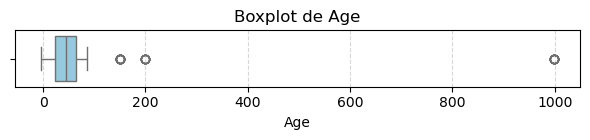

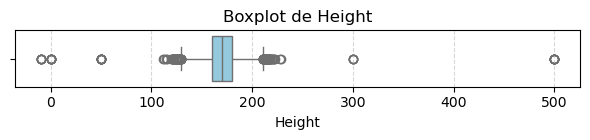

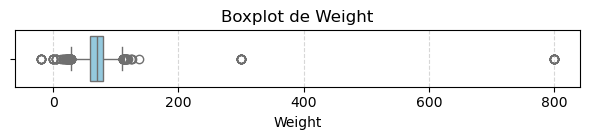

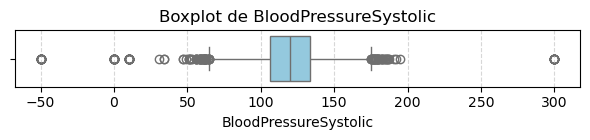

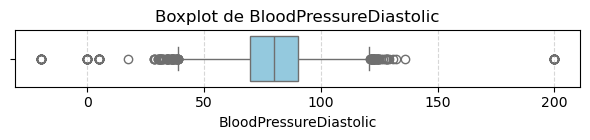

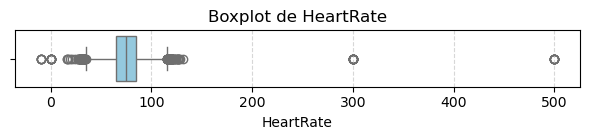

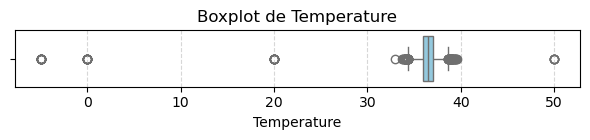


💭 REFLEXIÓN:
Variable con más atípicos: _____BloodPressureSystolic__________
Posibles causas: _______________


In [7]:
# 🎪 EJERCICIO 2.4: Detección de Valores Atípicos
print("🎪 DETECCIÓN DE VALORES ATÍPICOS")
print("=" * 40)
rangos_normales = {
    "Age": (0, 120),
    "Height": (50, 250),
    "Weight": (2, 300),
    "BloodPressureSystolic": (70, 200),
    "BloodPressureDiastolic": (40, 130),
    "HeartRate": (30, 200),
    "Temperature": (34, 42),
}
# TODO: Detecta valores atípicos en variables numéricas:
# 1. Age (edades imposibles)
# 2. Height y Weight (medidas extremas)
# 3. BloodPressureSystolic/Diastolic (presión anormal)
# 4. HeartRate (frecuencia cardíaca imposible)
# 5. Temperature (temperatura corporal extrema)

# Para cada variable numérica:
# - Calcula estadísticas descriptivas
# - Identifica valores fuera de rangos médicos normales
# - Crea visualizaciones (boxplots)

# Tu código aquí:
outliers = {}
for columna, (min_val, max_val) in rangos_normales.items():
    if columna in df_original.columns:
        # 🔧 Conversión segura a número
        df_original[columna] = pd.to_numeric(df_original[columna], errors="coerce")

        print(f"\n🔍 {columna}")
        print(df_original[columna].describe())

        fuera_de_rango = df_original[
            (df_original[columna] < min_val) | (df_original[columna] > max_val)
        ]
        count = fuera_de_rango.shape[0]
        print(f"➡️  Valores atípicos detectados: {count}")

        if count > 0:
            outliers[columna] = fuera_de_rango[[columna]]
if outliers:
    print("\nVariables con valores atípicos:")
    for var, df_out in outliers.items():
        print(f" - {var}: {df_out.shape[0]} casos")
else:
    print("\nNo se encontraron valores atípicos fuera de los rangos definidos.")

columnas_boxplot = list(rangos_normales.keys())
df_box = df_original.copy()

for col in columnas_boxplot:
    if col in df_box.columns:
        df_box[col] = pd.to_numeric(df_box[col], errors="coerce")

# Crear un boxplot para cada variable
for col in columnas_boxplot:
    if col in df_box.columns:
        plt.figure(figsize=(6, 1.5))
        sns.boxplot(x=df_box[col], color="skyblue")
        plt.title(f"Boxplot de {col}")
        plt.xlabel(col)
        plt.grid(True, axis="x", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()

print("\n💭 REFLEXIÓN:")
print("Variable con más atípicos: _____BloodPressureSystolic__________")
print("Posibles causas: _______________")

## 🛠️ Paso 3: Limpieza de Valores Faltantes

Ahora aplicarás estrategias específicas para manejar los valores faltantes según el contexto médico.

### 🎯 Estrategias por Tipo de Campo:

| 📋 **Tipo de Campo** | 🔧 **Estrategia Recomendada** | 📝 **Justificación** |
|---------------------|-------------------------------|---------------------|
| **Identificación** (PatientID) | Eliminar registro | Campo crítico |
| **Contacto** (Phone, Email) | Imputar "No disponible" | No crítico |
| **Médico Crítico** (BloodType) | Eliminar o flag especial | Importante para tratamiento |
| **Medidas** (Height, Weight) | Imputar con mediana | Valores típicos |
| **Opcional** (Allergies) | Imputar "Ninguna conocida" | Conservador |

In [8]:
# 🔧 EJERCICIO 3.1: Estrategia para Campos Críticos
print("🔧 LIMPIEZA DE CAMPOS CRÍTICOS")
print("=" * 40)

# TODO: Crea una copia del dataset para trabajar
df_clean = df_original.copy() # Tu código aquí

# TODO: Elimina registros donde falten campos críticos:
# - PatientID (si está faltante)
# - Campos que consideres absolutamente necesarios
campos_criticos = ['PatientID', 'Gender', 'DateOfBirth', 'DiagnosisCode',]
print("📊 Registros antes de eliminar críticos:", len(df_clean))

# Tu código aquí:



df_clean = df_clean.dropna(subset=campos_criticos)
print("📊 Registros después de eliminar críticos:", len(df_clean))
print("🗑️ Registros eliminados:", len(df_original) - len(df_clean))



# PREGUNTA: ¿Qué otros campos considerarías críticos en un contexto médico?

🔧 LIMPIEZA DE CAMPOS CRÍTICOS
📊 Registros antes de eliminar críticos: 15600
📊 Registros después de eliminar críticos: 15600
🗑️ Registros eliminados: 0


In [9]:
# 📞 EJERCICIO 3.2: Imputación de Campos de Contacto
print("📞 IMPUTACIÓN DE CAMPOS DE CONTACTO")
print("=" * 40)

# TODO: Para campos de contacto no críticos, imputa valores apropiados:
# - Phone: "No disponible"
# - Email: "No disponible"  
# - Address: "Dirección no registrada"
# - EmergencyContact: "No especificado"
# - EmergencyPhone: "No disponible"

# Tu código aquí:


print(f'Telefonos vacios originales:{df_original['Phone'].isna().sum()} ')
df_clean['Phone']=df_clean['Phone'].fillna('No disponible')
print(f'Telefonos vacios en df_clean :{df_clean['Phone'].isna().sum()} ')


def rellenar_na(df, columna, mensaje):
    df[columna] = df[columna].fillna(mensaje)

print("=" * 40)
print(f'Email  vacios originales:{df_original['Phone'].isna().sum()} ')
rellenar_na(df_clean,'Email','No disponible')
print(f'Email vacios vacios en df_clean :{df_clean['Phone'].isna().sum()} ')


print("=" * 40)
print(f'Address  vacios originales:{df_original['Address'].isna().sum()} ')
rellenar_na(df_clean,'Address','Dirección no registrada')
print(f'Address vacios vacios en df_clean:{df_clean['Address'].isna().sum()} ')

print("=" * 40)
print(f'EmergencyContact  vacios originales:{df_original['EmergencyContact'].isna().sum()} ')
rellenar_na(df_clean,'EmergencyContact','No especificado')
print(f'Address vacios vacios en df_clean: {df_clean['EmergencyContact'].isna().sum()} ')

print("=" * 40)
print(f'EmergencyPhone  vacios originales:{df_original['EmergencyPhone'].isna().sum()} ')
rellenar_na(df_clean,'EmergencyPhone','No disponible')
print(f'Address vacios vacios en df_clean:{df_clean['EmergencyPhone'].isna().sum()} ')

print("=" * 40)
print(f'EmergencyPhone  vacios originales:{df_original['EmergencyPhone'].isnull().sum()} ')

print(f'Address vacios vacios en df_clean:{df_clean['EmergencyPhone'].isnull().sum()} ')
# Valida los resultados
print("✅ Valores faltantes en campos de contacto después de imputación:")
contact_fields = ['Phone', 'Email', 'Address', 'EmergencyContact', 'EmergencyPhone']

for campo in contact_fields:
    faltantes=df_clean[campo].isna().sum()
    print(f'{campo}: {faltantes} faltantes')
# Muestra el recuento de faltantes para estos campos

📞 IMPUTACIÓN DE CAMPOS DE CONTACTO
Telefonos vacios originales:1572 
Telefonos vacios en df_clean :0 
Email  vacios originales:1572 
Email vacios vacios en df_clean :0 
Address  vacios originales:1830 
Address vacios vacios en df_clean:0 
EmergencyContact  vacios originales:3103 
Address vacios vacios en df_clean: 0 
EmergencyPhone  vacios originales:3891 
Address vacios vacios en df_clean:0 
EmergencyPhone  vacios originales:3891 
Address vacios vacios en df_clean:0 
✅ Valores faltantes en campos de contacto después de imputación:
Phone: 0 faltantes
Email: 0 faltantes
Address: 0 faltantes
EmergencyContact: 0 faltantes
EmergencyPhone: 0 faltantes


In [10]:
# 🩺 EJERCICIO 3.3: Imputación de Campos Médicos
print("🩺 IMPUTACIÓN DE CAMPOS MÉDICOS")
print("=" * 40)

# TODO: Para campos médicos, usa estrategias apropiadas:
# 1. Height/Weight: Imputa con la mediana (convierte a numérico primero)
# 2. BloodType: Mantén como faltante o elimina (decisión crítica)
# 3. Allergies: "Ninguna conocida"
# 4. ChronicConditions: "Ninguna conocida"
# 5. Medication/Dosage: Dependiendo del contexto

# Paso 1: Limpia y convierte campos numéricos
print("🔢 Limpiando campos numéricos...")

# Tu código aquí para Height:
df_clean['Height']= pd.to_numeric(df_original['Height'],errors='coerce')
medianaheight= round(df_clean['Height'].median())
print(f'Mediana de Height {medianaheight} ')
df_clean['Height']=df_clean['Height'].fillna(medianaheight)
print(f'Valores nulos en Height original {df_original['Height'].isnull().sum()}  ')
print(f'Nulos en el limpio {df_clean[ 'Height' ].isnull().sum()}')

# Tu código aquí para Weight:
print("=" * 40)

df_clean['Weight']= pd.to_numeric(df_original['Weight'],errors='coerce')
medianaWeight= round(df_clean['Weight'].median())
print(f'Mediana de Weight {medianaWeight} ')
df_clean['Weight']=df_clean['Weight'].fillna(medianaWeight)
print(f'Valores nulos en Height original {df_original['Weight'].isnull().sum()}  ')
print(f'Nulos en el limpio {df_clean[ 'Weight' ].isnull().sum()}')

print("=" * 40)

df_clean['Temperature']= pd.to_numeric(df_original['Temperature'],errors='coerce')
temperaturMedian= round(df_clean['Temperature'].median())
print(f'Mediana de Temperature {temperaturMedian} ')
df_clean['Temperature']=df_clean['Temperature'].fillna(temperaturMedian)
print(f'Valores nulos en Height original {df_original['Temperature'].isnull().sum()}  ')
print(f'Nulos en el limpio {df_clean[ 'Temperature' ].isnull().sum()}')

# Paso 2: Imputa campos médicos opcionales
print("💊 Imputando campos médicos opcionales...")

# Tu código aquí:

def rellenar_na(df, columna, mensaje):
    df[columna] = df[columna].fillna(mensaje)

print(f'Vacios originales en Allergies {df_original['Allergies'].isna().sum()} ')
rellenar_na(df_clean,'Allergies','Ninguna conocida')
print("=" * 40)
print(f'Vacios originales en ChronicConditions {df_original['ChronicConditions'].isna().sum()} ')
rellenar_na(df_clean,'ChronicConditions','Ninguna conocida')
print("=" * 40)
print(f'Vacios originales en Medication {df_original['Medication'].isna().sum()} ')
rellenar_na(df_clean,'Medication','No especificado')
print("=" * 40)
print(f'Vacios originales en Dosage {df_original['Dosage'].isna().sum()} ')
rellenar_na(df_clean,'Dosage','No especificada')
print(f'Vacios originales en Dosage {df_original['BloodType'].isna().sum()} ')
rellenar_na(df_clean,'BloodType','No especificada')
print(f'Vacios originales en Dosage {df_original['BloodType'].isna().sum()} ')


print("✅ Resumen de faltantes después de imputación médica:")
# Muestra resumen de valores faltantes restantes
contact_fields = ['BloodType', 'Allergies', 'ChronicConditions','Height','Weight','Dosage','Medication']

for campo in contact_fields:
    faltantes=df_clean[campo].isna().sum()
    print(f'{campo}: {faltantes} faltantes')

🩺 IMPUTACIÓN DE CAMPOS MÉDICOS
🔢 Limpiando campos numéricos...
Mediana de Height 170 
Valores nulos en Height original 1179  
Nulos en el limpio 0
Mediana de Weight 70 
Valores nulos en Height original 1135  
Nulos en el limpio 0
Mediana de Temperature 36 
Valores nulos en Height original 1258  
Nulos en el limpio 0
💊 Imputando campos médicos opcionales...
Vacios originales en Allergies 2846 
Vacios originales en ChronicConditions 2419 
Vacios originales en Medication 948 
Vacios originales en Dosage 929 
Vacios originales en Dosage 2386 
Vacios originales en Dosage 2386 
✅ Resumen de faltantes después de imputación médica:
BloodType: 0 faltantes
Allergies: 0 faltantes
ChronicConditions: 0 faltantes
Height: 0 faltantes
Weight: 0 faltantes
Dosage: 0 faltantes
Medication: 0 faltantes


## 👥 Paso 4: Eliminación de Duplicados

Los duplicados en registros médicos pueden ser peligrosos. Necesitas identificar y manejar cuidadosamente estos casos.

### 🎯 Tipos de Duplicados a Considerar:
1. **Exactos**: Registros 100% idénticos
2. **Por ID**: Mismo PatientID (re-registros)
3. **Por Identidad**: Mismo nombre + fecha nacimiento
4. **Fuzzy**: Nombres similares con pequeñas variaciones

In [11]:
# 👥 EJERCICIO 4.1: Eliminación de Duplicados Exactos
print("👥 ELIMINACIÓN DE DUPLICADOS EXACTOS")
print("=" * 40)

# TODO: 
# 1. Identifica y cuenta duplicados exactos
# 2. Elimina duplicados exactos manteniendo el primer registro
# 3. Documenta cuántos se eliminaron

print("📊 Registros antes de eliminar duplicados exactos:", len(df_original))

# Tu código aquí:
registroDuplicados=df_clean.duplicated().sum()
print(f'Datos duplicados: {registroDuplicados}')
df_clean = df_clean.drop_duplicates()
    

print("📊 Registros después de eliminar duplicados exactos:", len(df_clean))
print("🗑️ Duplicados exactos eliminados:", "___")

👥 ELIMINACIÓN DE DUPLICADOS EXACTOS
📊 Registros antes de eliminar duplicados exactos: 15600
Datos duplicados: 5
📊 Registros después de eliminar duplicados exactos: 15595
🗑️ Duplicados exactos eliminados: ___


In [12]:
# 🆔 EJERCICIO 4.2: Análisis de Duplicados por PatientID
print("🆔 ANÁLISIS DE DUPLICADOS POR PATIENTID")
print("=" * 40)

# TODO:
# 1. Encuentra registros con el mismo PatientID
# 2. Analiza si son verdaderos re-registros o errores
# 3. Decide una estrategia (eliminar o consolidar)

# Tu código aquí:

print(f'IDs duplicados : {duplicadosId}')

duplicados_id = df_clean[df_clean['PatientID'].duplicated(keep=False)]

ids_duplicados = df_clean['PatientID'][df_clean['PatientID'].duplicated()].unique()
# print("IDs duplicados:", ids_duplicados)
df_con_ids_duplicados = df_clean[df_clean['PatientID'].isin(ids_duplicados)]
df_con_ids_duplicados = df_con_ids_duplicados.sort_values(by=['PatientID', 'DateOfBirth'])

df_clean=df_clean.drop_duplicates(subset='PatientID',keep='first')

# Mostrar los primeros registros ordenados
print(df_con_ids_duplicados.head(20))
# PREGUNTA: Si un paciente tiene múltiples registros con el mismo ID, 
# ¿cómo decidirías cuál mantener?
print("\n💭 REFLEXIÓN:")
print("Estrategia para múltiples registros del mismo paciente: _______________")
print("- Si los registros tienen la misma información clínica, conservar solo el primero.")

🆔 ANÁLISIS DE DUPLICADOS POR PATIENTID
IDs duplicados : 226
       PatientID FirstName   LastName          DateOfBirth     Gender  \
177    PAT000178   Alberto     Vargas  1995-12-06 00:00:00   Femenino   
15135  PAT000178   Alberto     Vargas  1995-12-06 00:00:00   Femenino   
15125  PAT000188  Fernando    Jiménez           2017-01-29  Masculino   
187    PAT000188  Fernando    Jiménez  2017-01-29 00:00:00  Masculino   
275    PAT000276    Carlos       Díaz  2016-09-25 00:00:00  Masculino   
15004  PAT000276    Carlos       Díaz  2016-09-25 00:00:00  Masculino   
321    PAT000322   Beatriz  Hernández  1948-02-12 00:00:00   Femenino   
15066  PAT000322   Beatriz  Hernández  1948-02-12 00:00:00   Femenino   
335    PAT000336     Pedro        Gil  1994-11-18 00:00:00  Masculino   
15121  PAT000336     Pedro        Gil  1994-11-18 00:00:00  Masculino   
15106  PAT000523    Rafael    Serrano           2018-04-14  Masculino   
522    PAT000523    Rafael    Serrano  2018-04-14 00:00:00  Masc

In [13]:
# 👤 EJERCICIO 4.3: Detección de Duplicados por Identidad
print("👤 DETECCIÓN DE DUPLICADOS POR IDENTIDAD")
print("=" * 40)

# TODO:
# 1. Busca registros con mismo FirstName + LastName + DateOfBirth
# 2. Identifica posibles duplicados con errores tipográficos
# 3. Aplica una estrategia de limpieza conservadora

# Estrategia sugerida: Crear una columna de "identidad" normalizada
df_clean['NormalizedName'] = df_clean['FirstName'].str.upper().str.strip() + '_' + df_clean['LastName'].str.upper().str.strip()


# Tu código aquí:
duplicados_identidad = df_clean[df_clean.duplicated(subset=['NormalizedName', 'DateOfBirth'], keep=False)]

print(f"Registros con nombre + fecha duplicados (exactos): {len(duplicados_identidad)}")

df_clean = df_clean.drop_duplicates(subset=['NormalizedName', 'DateOfBirth'], keep='first')

print("💭 REFLEXIÓN:")
print("¿Cómo manejarías nombres muy similares pero no idénticos?")

👤 DETECCIÓN DE DUPLICADOS POR IDENTIDAD
Registros con nombre + fecha duplicados (exactos): 344
💭 REFLEXIÓN:
¿Cómo manejarías nombres muy similares pero no idénticos?


## 🔧 Paso 5: Estandarización de Formatos

La inconsistencia en formatos puede causar problemas graves en análisis posteriores. Necesitas estandarizar todos los campos.

### 🎯 Campos a Estandarizar:
- **Fechas**: Formato ISO (YYYY-MM-DD)
- **Teléfonos**: Formato único consistente
- **Nombres**: Capitalización adecuada
- **Géneros**: Valores estándar
- **Códigos médicos**: Formato válido

In [14]:
# 📅 EJERCICIO 5.1: Estandarización de Fechas
print("📅 ESTANDARIZACIÓN DE FECHAS")
print("=" * 40)

# TODO: Estandariza las columnas de fecha:
# 1. DateOfBirth
# 2. AdmissionDate
# 3. LastVisitDate

# Estrategia:
# - Intenta convertir con pd.to_datetime()
# - Maneja errores convirtiendo a NaT
# - Documenta valores que no se pudieron convertir

date_columns = ["DateOfBirth", "AdmissionDate", "LastVisitDate"]

for col in date_columns:
    print(f"\n🔄 Procesando {col}...")

    # Tu código aquí:
    # 1. Muestra algunos valores problemáticos antes de convertir
    print("Ejemplos antes de conversión:")
    print(df_clean[col].dropna().unique()[:5])  
    # 2. Convierte a datetime
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
    # 3. Reporta cuántos valores no se pudieron convertir
    no_convertidos = df_clean[col].isna().sum()
    print(f"❌ Valores no convertidos (NaT): {no_convertidos}")


print("✅ Fechas estandarizadas exitosamente!")

📅 ESTANDARIZACIÓN DE FECHAS

🔄 Procesando DateOfBirth...
Ejemplos antes de conversión:
['2009-12-04 00:00:00' '1966-06-04 00:00:00' '1954-02-20 00:00:00'
 '1995-05-02 00:00:00' '2019-03-22 00:00:00']
❌ Valores no convertidos (NaT): 1568

🔄 Procesando AdmissionDate...
Ejemplos antes de conversión:
['2025-01-06 15:57:16.828281' '2024-05-30 15:57:16.828290'
 '2024-09-02 15:57:16.828292' '2025-02-08 15:57:16.828294'
 '2025-05-29 15:57:16.828294']
❌ Valores no convertidos (NaT): 1479

🔄 Procesando LastVisitDate...
Ejemplos antes de conversión:
['2025-05-24 15:57:16.877774' '2025-04-23 15:57:16.877785'
 '2024-12-26 15:57:16.877787' '2024-12-03 15:57:16.877788'
 '2025-05-14 15:57:16.877789']
❌ Valores no convertidos (NaT): 1486
✅ Fechas estandarizadas exitosamente!


In [15]:
# 📱 EJERCICIO 5.2: Estandarización de Teléfonos
print("📱 ESTANDARIZACIÓN DE TELÉFONOS")
print("=" * 40)

# TODO: Crea una función para limpiar teléfonos
def clean_phone(phone):
    """
    Limpia y estandariza números de teléfono
    Formato objetivo: 6XXXXXXXX (para móviles españoles)
    """
    if pd.isna(phone) or phone == 'No disponible':
        return phone
    
    # Tu código aquí:
    # 1. Convertir a string
    phone_str = str(phone)

    # 2. Remover caracteres especiales (+, -, espacios, paréntesis)
    phone_str = phone_str.replace(' ', '').replace('+', '').replace('-', '').replace('.', '').replace('(', '').replace(')', '')

    # 3. Manejar prefijo internacional (+34)
    if phone_str.startswith('34'):
        phone_str = phone_str[2:]
    # 4. Validar que tiene 9 dígitos para números españoles

    # 5. Marcar como "TELEFONO_INVALIDO" si no cumple criterios
    if phone_str.isdigit() and len(phone_str) == 9:
        return phone_str
    else:
        return 'TELEFONO_INVALIDO'
    
    

# Aplica la función a las columnas de teléfono
phone_columns = ['Phone', 'EmergencyPhone']

for col in phone_columns:
    print(f"\n📞 Limpiando {col}...")
    # Tu código aquí:
    df_clean[col] = df_clean[col].apply(clean_phone)


print("✅ Teléfonos estandarizados!")

📱 ESTANDARIZACIÓN DE TELÉFONOS

📞 Limpiando Phone...

📞 Limpiando EmergencyPhone...
✅ Teléfonos estandarizados!


In [16]:
# 👤 EJERCICIO 5.3: Estandarización de Nombres y Géneros
print("👤 ESTANDARIZACIÓN DE NOMBRES Y GÉNEROS")
print("=" * 40)


# TODO: Estandariza nombres
def clean_name(name):
    """Limpia y estandariza nombres"""
    if pd.isna(name):
        return name

    # Tu código aquí:
    # 1. Convertir a string
    if pd.isna(name):
        return name
    
    reemplazos = {
        'á': 'a',
        'é': 'e',
        'í': 'i',
        'ó': 'o',
        'ú': 'u',
        'ü': 'u',
        'ñ': 'n' 
    }
    # 2. Remover espacios extra
    # 3. Capitalizar correctamente (Title Case)
    name_str = str(name).strip().title()
    # 4. Manejar caracteres especiales

    for original, reemplazo in reemplazos.items():
        name = name.replace(original, reemplazo)

    return name.title()


# Aplica a nombres
name_columns = ["FirstName", "LastName", "EmergencyContact"]
for col in name_columns:
    # Tu código aquí:
    df_clean[col] = df_clean[col].apply(clean_name)
    

print("✅ Nombres estandarizados!")

# TODO: Estandariza géneros
print("\n⚥ Estandarizando géneros...")


def standardize_gender(gender):
    """Estandariza valores de género"""
    if pd.isna(gender):
        return gender

    gender = str(gender).upper().strip()

    # Tu código aquí:
    # Mapear todas las variaciones a "Masculino" o "Femenino"
    # Ejemplos: M, MASCULINO, Hombre, Male -> "Masculino"
    #          F, FEMENINO, Mujer, Female -> "Femenino"
    mapa_generos = {
        'm': 'Masculino',
        'masculino': 'Masculino',
        'male': 'Masculino',
        'hombre': 'Masculino',
        'f': 'Femenino',
        'femenino': 'Femenino',
        'female': 'Femenino',
        'mujer': 'Femenino'
    }
    return mapa_generos.get(gender, 'No especificado')


# Aplica estandarización de género
# Tu código aquí:
df_clean['Gender'] = df_clean['Gender'].apply(standardize_gender)
print("✅ Géneros estandarizados!")

👤 ESTANDARIZACIÓN DE NOMBRES Y GÉNEROS
✅ Nombres estandarizados!

⚥ Estandarizando géneros...
✅ Géneros estandarizados!


## 🎪 Paso 6: Tratamiento de Valores Atípicos

Los valores atípicos en datos médicos pueden indicar errores de captura o casos médicos especiales. Debes manejarlos cuidadosamente.

### 🎯 Rangos Médicos Normales:
- **Edad**: 0-120 años
- **Altura**: 50-250 cm  
- **Peso**: 2-300 kg
- **Presión Sistólica**: 70-200 mmHg
- **Presión Diastólica**: 40-120 mmHg
- **Frecuencia Cardíaca**: 30-200 bpm
- **Temperatura**: 35-42°C

In [17]:
# 🎪 EJERCICIO 6.1: Detección Sistemática de Atípicos
print("🎪 DETECCIÓN SISTEMÁTICA DE VALORES ATÍPICOS")
print("=" * 40)

# TODO: Define rangos médicos válidos
medical_ranges = {
    'Age': (0, 120),
    'Height': (50, 250),  # cm
    'Weight': (2, 300),   # kg
    'BloodPressureSystolic': (70, 200),
    'BloodPressureDiastolic': (40, 120),
    'HeartRate': (30, 200),
    'Temperature': (35, 42),
    'BMI': (10, 60)
}

# Función para detectar atípicos
def detect_outliers(df, column, min_val, max_val):
    """Detecta valores fuera del rango médico normal"""
    # Tu código aquí:
    # 1. Convierte la columna a numérico
    df[column] = pd.to_numeric(df[column], errors='coerce')
    # 2. Identifica valores fuera del rango
    outliers = df[(df[column] < min_val) | (df[column] > max_val)]
    # 3. Retorna índices de valores atípicos
    return outliers.index

outlier_summary = {}
# Aplica detección a cada variable
outlier_summary = {}
for column, (min_val, max_val) in medical_ranges.items():
    if column in df_clean.columns:
        print(f"\n🔍 Analizando {column} (rango normal: {min_val}-{max_val})...")
        # Tu código aquí:
        indices_outliers = detect_outliers(df_clean, column, min_val, max_val)
        cantidad = len(indices_outliers)
        print(f"Valores atípicos encontrados: {cantidad}")
        outlier_summary[column] = cantidad

print("\n📊 RESUMEN DE VALORES ATÍPICOS:")
for column, count in outlier_summary.items():
    print(f"   {column}: {count} valores atípicos")

🎪 DETECCIÓN SISTEMÁTICA DE VALORES ATÍPICOS

🔍 Analizando Age (rango normal: 0-120)...
Valores atípicos encontrados: 60

🔍 Analizando Height (rango normal: 50-250)...
Valores atípicos encontrados: 25

🔍 Analizando Weight (rango normal: 2-300)...
Valores atípicos encontrados: 24

🔍 Analizando BloodPressureSystolic (rango normal: 70-200)...
Valores atípicos encontrados: 170

🔍 Analizando BloodPressureDiastolic (rango normal: 40-120)...
Valores atípicos encontrados: 196

🔍 Analizando HeartRate (rango normal: 30-200)...
Valores atípicos encontrados: 52

🔍 Analizando Temperature (rango normal: 35-42)...
Valores atípicos encontrados: 475

🔍 Analizando BMI (rango normal: 10-60)...
Valores atípicos encontrados: 75

📊 RESUMEN DE VALORES ATÍPICOS:
   Age: 60 valores atípicos
   Height: 25 valores atípicos
   Weight: 24 valores atípicos
   BloodPressureSystolic: 170 valores atípicos
   BloodPressureDiastolic: 196 valores atípicos
   HeartRate: 52 valores atípicos
   Temperature: 475 valores atípi

In [18]:
# 🔧 EJERCICIO 6.2: Tratamiento de Valores Atípicos
print("🔧 TRATAMIENTO DE VALORES ATÍPICOS")
print("=" * 40)

# TODO: Implementa estrategias de tratamiento:
# 1. Valores imposibles -> NaN
# 2. Valores extremos pero posibles -> Marcar con flag
# 3. Errores de entrada (texto en numéricos) -> NaN


def treat_outliers(df, column, min_val, max_val, strategy="cap"):
    """
    Trata valores atípicos según estrategia especificada

    Strategies:
    - 'remove': Convierte a NaN
    - 'cap': Limita a min/max
    - 'flag': Marca pero mantiene valor
    """
    # Tu código aquí:
    df[column] = pd.to_numeric(df[column], errors="coerce")  # Convierte a numérico

    if strategy == "remove":
        df.loc[(df[column] < min_val) | (df[column] > max_val), column] = pd.NA

    elif strategy == "cap":
        df[column] = df[column].clip(lower=min_val, upper=max_val)

    elif strategy == "flag":
        flag_column = f"{column}_Atipico"
        df[flag_column] = (df[column] < min_val) | (df[column] > max_val)

    else:
        print(f"⚠️ Estrategia no reconocida para {column}")


# Aplica tratamiento
print("🏥 Aplicando tratamiento médico conservador...")

# Para cada variable, decide la estrategia más apropiada:
treatment_strategies = {
    "Age": "remove",  # Edades imposibles son errores claros
    "Height": "remove",  # Alturas imposibles son errores
    "Weight": "remove",  # Pesos imposibles son errores
    "BloodPressureSystolic": "flag",  # Podría ser emergencia médica
    "BloodPressureDiastolic": "flag",  # Podría ser emergencia médica
    "HeartRate": "flag",  # Podría ser condición médica
    "Temperature": "flag",  # Podría ser fiebre alta o hipotermia
}

for column, strategy in treatment_strategies.items():
    if column in df_clean.columns and column in medical_ranges:
        min_val, max_val = medical_ranges[column]
        print(f"\n🔄 Tratando {column} con estrategia '{strategy}'...")
        # Tu código aquí:
        treat_outliers(df_clean, column, min_val, max_val, strategy)

print("✅ Valores atípicos tratados!")

🔧 TRATAMIENTO DE VALORES ATÍPICOS
🏥 Aplicando tratamiento médico conservador...

🔄 Tratando Age con estrategia 'remove'...

🔄 Tratando Height con estrategia 'remove'...

🔄 Tratando Weight con estrategia 'remove'...

🔄 Tratando BloodPressureSystolic con estrategia 'flag'...

🔄 Tratando BloodPressureDiastolic con estrategia 'flag'...

🔄 Tratando HeartRate con estrategia 'flag'...

🔄 Tratando Temperature con estrategia 'flag'...
✅ Valores atípicos tratados!


## 🔢 Paso 7: Corrección de Tipos de Datos

Asegúrate de que cada columna tiene el tipo de dato correcto para análisis posteriores.

### 🎯 Tipos Objetivo:
- **Identificadores**: String
- **Fechas**: datetime64
- **Medidas**: float64
- **Categorías**: category o string
- **Booleanos**: bool

In [19]:
# 🔢 EJERCICIO 7.1: Conversión de Tipos de Datos
print("🔢 CONVERSIÓN DE TIPOS DE DATOS")
print("=" * 40)

# TODO: Define los tipos objetivo para cada columna
target_types = {
    'PatientID': 'string',
    'FirstName': 'string',
    'LastName': 'string',
    'DateOfBirth': 'datetime64[ns]',
    'Gender': 'category',
    'Phone': 'string',
    'Email': 'string',
    'Address': 'string',
    'BloodType': 'category',
    'Height': 'float64',
    'Weight': 'float64',
    'BMI': 'float64',
    'BloodPressureSystolic': 'float64',
    'BloodPressureDiastolic': 'float64',
    'HeartRate': 'float64',
    'Temperature': 'float64',
    'AdmissionDate': 'datetime64[ns]',
    'Specialty': 'category',
    'DiagnosisCode': 'string',
    'DiagnosisDescription': 'string',
    'Medication': 'string',
    'Dosage': 'string',
    'MaritalStatus': 'category',
    'InsuranceType': 'category',
    'InsuranceNumber': 'string',
    'EmergencyContact': 'string',
    'EmergencyPhone': 'string',
    'Allergies': 'string',
    'ChronicConditions': 'string',
    'LastVisitDate': 'datetime64[ns]',
    'Age': 'int64'
}

print("📊 Tipos actuales vs objetivos:")
for column in df_clean.columns:
    current_type = df_clean[column].dtype
    target_type = target_types.get(column, 'sin especificar')
    print(f"   {column}: {current_type} -> {target_type}")

# TODO: Aplica las conversiones de tipo
print("\n🔄 Aplicando conversiones...")

for column, target_type in target_types.items():
    if column in df_clean.columns:
        try:
            # Tu código aquí:
            # Convierte cada columna al tipo objetivo
            # Maneja errores apropiadamente
            if 'datetime' in target_type:
                df_clean[column] = pd.to_datetime(df_clean[column], errors='coerce')
            else:
                df_clean[column] = df_clean[column].astype(target_type)
            
        except Exception as e:
            print(f"⚠️ Error convirtiendo {column}: {e}")

print("✅ Tipos de datos corregidos!")

🔢 CONVERSIÓN DE TIPOS DE DATOS
📊 Tipos actuales vs objetivos:
   PatientID: object -> string
   FirstName: object -> string
   LastName: object -> string
   DateOfBirth: datetime64[ns] -> datetime64[ns]
   Gender: object -> category
   Phone: object -> string
   Email: object -> string
   Address: object -> string
   BloodType: object -> category
   Height: float64 -> float64
   Weight: float64 -> float64
   BMI: float64 -> float64
   BloodPressureSystolic: float64 -> float64
   BloodPressureDiastolic: float64 -> float64
   HeartRate: float64 -> float64
   Temperature: float64 -> float64
   AdmissionDate: datetime64[ns] -> datetime64[ns]
   Specialty: object -> category
   DiagnosisCode: object -> string
   DiagnosisDescription: object -> string
   Medication: object -> string
   Dosage: object -> string
   MaritalStatus: object -> category
   InsuranceType: object -> category
   InsuranceNumber: object -> string
   EmergencyContact: object -> string
   EmergencyPhone: object -> string

In [20]:
# 🧮 EJERCICIO 7.2: Recalcular Campos Derivados
print("🧮 RECÁLCULO DE CAMPOS DERIVADOS")
print("=" * 40)

# TODO: Recalcula campos que dependen de otros:
# 1. BMI = Weight(kg) / (Height(m))^2
# 2. Age = Years desde DateOfBirth hasta AdmissionDate

print("📏 Recalculando BMI...")
# Tu código aquí:
# 1. Convierte altura a metros
altura_m = df_clean['Height'] / 100
peso = df_clean['Weight']
# 2. Calcula BMI solo donde height y weight son válidos
# 3. Redondea a 1 decimal
condicion_valida = (altura_m > 0) & (peso > 0)

df_clean.loc[condicion_valida, 'BMI'] = (peso[condicion_valida] / (altura_m[condicion_valida] ** 2)).round(1)


print("🎂 Recalculando Age...")
# Tu código aquí:
# 1. Calcula edad en años basado en fechas
# 2. Maneja casos donde las fechas son NaT
dob = pd.to_datetime(df_clean['DateOfBirth'], errors='coerce')
adm = pd.to_datetime(df_clean['AdmissionDate'], errors='coerce')
edad_valida = dob.notna() & adm.notna()
df_clean.loc[edad_valida, 'Age'] = ((adm[edad_valida] - dob[edad_valida]).dt.days // 365).astype('Int64')

print("✅ Campos derivados recalculados!")

# Validación
print("\n📊 Estadísticas de campos recalculados:")
print("BMI:")
print(df_clean['BMI'].describe())
print("\nAge:")
print(df_clean['Age'].describe())

🧮 RECÁLCULO DE CAMPOS DERIVADOS
📏 Recalculando BMI...
🎂 Recalculando Age...
✅ Campos derivados recalculados!

📊 Estadísticas de campos recalculados:
BMI:
count    15202.000000
mean        24.955618
std          9.898437
min          1.300000
25%         20.100000
50%         24.200000
75%         28.600000
max        395.600000
Name: BMI, dtype: float64

Age:
count    15192.000000
mean        43.688257
std         23.674033
min          0.000000
25%         23.000000
50%         44.000000
75%         64.000000
max         85.000000
Name: Age, dtype: float64


In [21]:
print("\n🛠️ IMPUTACIÓN FINAL DE VALORES FALTANTES")
print("=" * 40)

from datetime import datetime

# Imputación conservadora
today = pd.Timestamp.today()


df_clean['DateOfBirth'] = df_clean['DateOfBirth'].fillna(today)
df_clean['AdmissionDate'] = df_clean['AdmissionDate'].fillna(today)
df_clean['LastVisitDate'] = df_clean['LastVisitDate'].fillna(today)


text_fields_na = ['InsuranceNumber', 'Medication', 'Dosage']
for col in text_fields_na:
    df_clean[col] = df_clean[col].fillna('No especificado')


num_fields = ['BloodPressureSystolic', 'Height', 'Weight', 'Temperature']
for col in num_fields:
    if col in df_clean.columns:
        median_val = df_clean[col].median()
        df_clean[col] = df_clean[col].fillna(median_val)

print("✅ Imputación final completada")


🛠️ IMPUTACIÓN FINAL DE VALORES FALTANTES
✅ Imputación final completada


## ✅ Paso 8: Validación Final

Antes de dar por terminada la limpieza, debes validar que el dataset está en buenas condiciones.

### 🎯 Validaciones Requeridas:
1. **Completitud**: Verificar valores faltantes restantes
2. **Consistencia**: Verificar relaciones lógicas
3. **Integridad**: Verificar rangos válidos
4. **Calidad**: Métricas generales de calidad

In [22]:
# ✅ EJERCICIO 8.1: Reporte de Completitud
print("✅ REPORTE DE COMPLETITUD")
print("=" * 40)

# TODO: Genera un reporte completo de la calidad final
print("📊 VALORES FALTANTES FINALES:")
missing_final = df_clean.isnull().sum().sort_values(ascending=False)
total_rows = len(df_clean)

for column, missing in missing_final.items():
    if missing > 0:
        percentage = (missing / total_rows) * 100
        print(f"   {column}: {missing:,} ({percentage:.1f}%)")

print(f"\n📏 DIMENSIONES FINALES:")
print(f"   Filas: {df_clean.shape[0]:,}")
print(f"   Columnas: {df_clean.shape[1]}")

print(f"\n👥 DUPLICADOS FINALES:")
print(f"   Duplicados exactos: {df_clean.duplicated().sum()}")

# TODO: Calcula métricas de calidad
total_cells = df_clean.shape[0] * df_clean.shape[1]
empty_cells = df_clean.isnull().sum().sum()
completeness = ((total_cells - empty_cells) / total_cells) * 100

print(f"\n📈 MÉTRICAS DE CALIDAD:")
print(f"   Completitud general: {completeness:.1f}%")
print(f"   Celdas vacías: {empty_cells:,} de {total_cells:,}")

✅ REPORTE DE COMPLETITUD
📊 VALORES FALTANTES FINALES:
   HeartRate: 39 (0.3%)
   Age: 10 (0.1%)

📏 DIMENSIONES FINALES:
   Filas: 15,202
   Columnas: 36

👥 DUPLICADOS FINALES:


   Duplicados exactos: 0

📈 MÉTRICAS DE CALIDAD:
   Completitud general: 100.0%
   Celdas vacías: 49 de 547,272


In [31]:
# 🔍 EJERCICIO 8.2: Validaciones de Consistencia
print("🔍 VALIDACIONES DE CONSISTENCIA")
print("=" * 40)

# TODO: Verifica relaciones lógicas entre campos
print("🏥 Verificando consistencias médicas...")

# 1. BMI vs Height/Weight
print("\n1️⃣ Consistencia BMI:")
# Calcula BMI esperado y compara con BMI almacenado
# Tu código aquí:
bmi_recalc = df_clean['Weight'] / ((df_clean['Height'] / 100) ** 2)
bmi_diff = (bmi_recalc - df_clean['BMI']).abs()
inconsist_bmi = df_clean[bmi_diff > 1.0]
print(f"   Registros con BMI inconsistente (>1 punto de diferencia): {len(inconsist_bmi)}")

# 2. Edad vs Fechas
print("\n2️⃣ Consistencia de Edad:")
# Verifica que la edad calculada sea consistente
# Tu código aquí:
expected_age = ((df_clean['AdmissionDate'] - df_clean['DateOfBirth']).dt.days // 365)
age_diff = (df_clean['Age'] - expected_age).abs()
inconsist_age = df_clean[age_diff > 1]
print(f"   Registros con edad inconsistente (>1 año de diferencia): {len(inconsist_age)}")


# 3. Presión arterial
# Verifica que sistólica > diastólica
# Tu código aquí:
print("\n3️⃣ Consistencia Presión Arterial:")
bp_inconsist = df_clean[df_clean['BloodPressureSystolic'] <= df_clean['BloodPressureDiastolic']]
print(f"   Registros con presión sistólica <= diastólica: {len(bp_inconsist)}")


# 4. Fechas lógicas
print("\n4️⃣ Consistencia de Fechas:")
# Verifica que AdmissionDate >= DateOfBirth
# Verifica que LastVisitDate <= AdmissionDate (si aplicable)
# Tu código aquí:
bad_birth = df_clean[df_clean['AdmissionDate'] < df_clean['DateOfBirth']]
bad_visit = df_clean[df_clean['LastVisitDate'] < df_clean['AdmissionDate']]
print(f"   Registros donde fecha de admisión < nacimiento: {len(bad_birth)}")
print(f"   Registros donde última visita < admisión: {len(bad_visit)}")

print("✅ Validaciones de consistencia completadas!")

🔍 VALIDACIONES DE CONSISTENCIA
🏥 Verificando consistencias médicas...

1️⃣ Consistencia BMI:
   Registros con BMI inconsistente (>1 punto de diferencia): 17

2️⃣ Consistencia de Edad:
   Registros con edad inconsistente (>1 año de diferencia): 691

3️⃣ Consistencia Presión Arterial:
   Registros con presión sistólica <= diastólica: 901

4️⃣ Consistencia de Fechas:

4️⃣ Consistencia de Fechas:
   Registros donde fecha de admisión < nacimiento: 1398
   Registros donde última visita < admisión: 4393
✅ Validaciones de consistencia completadas!


In [32]:
# 💾 EJERCICIO 8.3: Guardar Dataset Limpio
print("💾 GUARDANDO DATASET LIMPIO")
print("=" * 40)

# TODO: Guarda el dataset limpio con documentación
from datetime import datetime

# Generar nombre con timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
clean_filename = f"registros_medicos_limpios_{timestamp}.csv"

# Guardar dataset limpio
df_clean.to_csv(clean_filename, index=False)
print(f"✅ Dataset limpio guardado como: {clean_filename}")

# También guardar con nombre fijo
df_clean.to_csv("registros_medicos_limpios.csv", index=False)
print(f"✅ También guardado como: registros_medicos_limpios.csv")

# TODO: Crear reporte de transformaciones aplicadas
original_rows = df_original.shape[0]
clean_rows = df_clean.shape[0]
removed_rows = original_rows - clean_rows
report = f"""
📋 REPORTE DE LIMPIEZA DE DATOS MÉDICOS
{'='*50}

📅 Fecha de procesamiento: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

📊 RESUMEN DE TRANSFORMACIONES:
   ✅ Valores faltantes imputados/eliminados
   ✅ Duplicados detectados y eliminados  
   ✅ Formatos estandarizados (fechas, teléfonos, nombres)
   ✅ Valores atípicos tratados según criterio médico
   ✅ Tipos de datos corregidos
   ✅ Campos derivados recalculados

📏 DIMENSIONES:
   Dataset original: {original_rows:,} filas
   Dataset limpio: {df_clean.shape[0]:,} filas
   Registros eliminados: {removed_rows:,} 
   Columnas: {df_clean.shape[1]}

📈 CALIDAD FINAL:
   Completitud: {completeness:.1f}%
   Duplicados: {df_clean.duplicated().sum()}
   Tipos correctos: ✅

🎯 PRÓXIMOS PASOS RECOMENDADOS:
   1. Análisis exploratorio de datos (EDA)
   2. Feature engineering para variables predictivas
   3. Análisis estadístico y correlaciones
   4. Preparación para modelado (encoding, scaling)
"""

# Guardar reporte
with open(f"reporte_limpieza_{timestamp}.txt", "w", encoding="utf-8") as f:
    f.write(report)

print(report)
print(f"\n📝 Reporte guardado como: reporte_limpieza_{timestamp}.txt")

💾 GUARDANDO DATASET LIMPIO
✅ Dataset limpio guardado como: registros_medicos_limpios_20250618_123749.csv
✅ También guardado como: registros_medicos_limpios.csv

📋 REPORTE DE LIMPIEZA DE DATOS MÉDICOS

📅 Fecha de procesamiento: 2025-06-18 12:37:50

📊 RESUMEN DE TRANSFORMACIONES:
   ✅ Valores faltantes imputados/eliminados
   ✅ Duplicados detectados y eliminados  
   ✅ Formatos estandarizados (fechas, teléfonos, nombres)
   ✅ Valores atípicos tratados según criterio médico
   ✅ Tipos de datos corregidos
   ✅ Campos derivados recalculados

📏 DIMENSIONES:
   Dataset original: 15,600 filas
   Dataset limpio: 15,202 filas
   Registros eliminados: 398 
   Columnas: 36

📈 CALIDAD FINAL:
   Completitud: 100.0%
   Duplicados: 0
   Tipos correctos: ✅

🎯 PRÓXIMOS PASOS RECOMENDADOS:
   1. Análisis exploratorio de datos (EDA)
   2. Feature engineering para variables predictivas
   3. Análisis estadístico y correlaciones
   4. Preparación para modelado (encoding, scaling)


📝 Reporte guardado como: 

## 🎉 ¡Felicitaciones! Ejercicio Completado

Has completado exitosamente el ejercicio de limpieza de datos médicos. 

### 📚 Lo que has aprendido:

1. **🔍 Análisis Exploratorio**: Identificar problemas de calidad en datos reales
2. **🛠️ Técnicas de Limpieza**: Aplicar estrategias específicas para cada tipo de problema
3. **🏥 Contexto de Dominio**: Considerar aspectos médicos en decisiones de limpieza
4. **📊 Validación**: Verificar la calidad y consistencia del resultado final
5. **📝 Documentación**: Mantener registro de todas las transformaciones

### 🎯 Evaluación de tu trabajo:

**Revisa que hayas completado:**
- [ ] ✅ Análisis completo de problemas de calidad
- [ ] ✅ Estrategias apropiadas para valores faltantes
- [ ] ✅ Eliminación correcta de duplicados
- [ ] ✅ Estandarización de formatos
- [ ] ✅ Tratamiento médicamente apropiado de atípicos
- [ ] ✅ Corrección de tipos de datos
- [ ] ✅ Validación y documentación final

### 🚀 Próximos pasos:

1. **📊 EDA Avanzado**: Explora patrones en los datos limpios
2. **🔬 Análisis Estadístico**: Busca correlaciones y tendencias médicas
3. **🤖 Preparación para ML**: Feature engineering y encoding
4. **📈 Visualizaciones**: Crea dashboards para profesionales médicos

---

> 💡 **Recuerda**: En el mundo real, la limpieza de datos médicos debe siempre involucrar a profesionales del dominio médico para validar decisiones críticas.

**¡Excelente trabajo! 🎉👩‍⚕️👨‍⚕️**